<a href="https://colab.research.google.com/github/tripuragorla/CMPE-297-Assignments/blob/main/Assignment%203/HuggingFaces_GrammaticalError_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb
!wandb login

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 180 kB 42.7 MB/s 
     |████████████████████████████████| 139 kB 43.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=631b182ec203b1ebca1e6d64b64f6622c5798950fbc8b2f52ee81dc9a537e1ac
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=794b041476f3067db6a77132ddf612036e03db91d7c2969404619017dc4e0519
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wan

In [ ]:
import wandb

wandb.init(project="Hugging-Face Grammatical Error", entity="shivkumarganesh")

wandb: Currently logged in as: shivkumarganesh (use `wandb login --relogin` to force relogin)


In [ ]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.2 MB/s 
     |████████████████████████████████| 596 kB 32.4 MB/s 
     |████████████████████████████████| 895 kB 47.3 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 290 kB 5.3 MB/s 
     |████████████████████████████████| 243 kB 42.8 MB/s 
     |████████████████████████████████| 1.3 MB 36.7 MB/s 
     |████████████████████████████████| 125 kB 53.2 MB/s 
     |████████████████████████████████| 271 kB 50.1 MB/s 
     |████████████████████████████████| 160 kB 50.7 MB/s 


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("shivkumarganesh/CoLA")

checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Using custom data configuration shivkumarganesh___CoLA-b32330b47484694b


  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/472k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/shivkumarganesh___CoLA-b32330b47484694b/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
# Inspecting the Data Structure IMDB
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'id', 'label', 'etc', 'text'],
        num_rows: 8551
    })
})

In [ ]:
def tokenizer_function(example):
  return tokenizer(example['text'], truncation=True)

In [ ]:
tokenized_datasets = raw_datasets.map(tokenizer_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  0%|          | 0/9 [00:00<?, ?ba/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'attention_mask', 'etc', 'id', 'input_ids', 'label', 'text'],
        num_rows: 8551
    })
})

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(6551))
small_eval_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(2000))

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/csv/shivkumarganesh___CoLA-b32330b47484694b/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a/cache-16a72e4f315cd33a.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/csv/shivkumarganesh___CoLA-b32330b47484694b/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a/cache-16a72e4f315cd33a.arrow


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

In [ ]:
from datasets import load_metric
import numpy as np

def compute_metrics(eval_preds):
    metric = load_metric("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch", report_to='wandb')

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset = small_train_dataset,
    eval_dataset = small_eval_dataset,
    data_collator = data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, etc, id, Unnamed: 0.
***** Running training *****
  Num examples = 6551
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2457
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.598400,0.340835,0.885000,0.922402
2,0.329900,0.105269,0.964500,0.975407
3,0.214400,0.078333,0.977000,0.983961


Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, etc, id, Unnamed: 0.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8


Downloading:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1000/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1500
Configuration saved in test-trainer/checkpoint-1500/config.json
Model weights saved in test-trainer/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-1500/special_tokens_map.json
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, etc, id, Unnamed: 0.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8
Saving model checkpoint to test-trainer/ch

TrainOutput(global_step=2457, training_loss=0.35798336676479986, metrics={'train_runtime': 237.8746, 'train_samples_per_second': 82.619, 'train_steps_per_second': 10.329, 'total_flos': 92758743556536.0, 'train_loss': 0.35798336676479986, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, etc, id, Unnamed: 0.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8


{'epoch': 3.0,
 'eval_accuracy': 0.977,
 'eval_f1': 0.9839609483960948,
 'eval_loss': 0.07833299785852432,
 'eval_runtime': 4.9741,
 'eval_samples_per_second': 402.08,
 'eval_steps_per_second': 50.26}

In [ ]:
wandb.finish()

eval/accuracy,▁▇██
eval/f1,▁▇██
eval/loss,█▂▁▁
eval/runtime,█▁▁▄
eval/samples_per_second,▁██▅
eval/steps_per_second,▁██▅
train/epoch,▁▂▃▅▅▆███
train/global_step,▁▂▃▅▅▆███
train/learning_rate,█▆▃▁
train/loss,█▆▃▁
train/total_flos,▁


In [ ]:
!pip install gradio

     |████████████████████████████████| 2.0 MB 7.1 MB/s 
     |████████████████████████████████| 206 kB 42.3 MB/s 
     |████████████████████████████████| 1.9 MB 34.4 MB/s 
     |████████████████████████████████| 3.5 MB 36.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 961 kB 41.7 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=7ace86b8bdf1a12225bff5206c7351a209329280c3b5096e04260bcb3bad9b90
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=446290010708f73f7e017bbfa60eb55123f9cd864055204da55800f3ebbfc513
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
model.save_pretrained('/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification')

Configuration saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/config.json
Model weights saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/pytorch_model.bin


In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification')

tokenizer config file saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/special_tokens_map.json


('/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/tokenizer_config.json',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/special_tokens_map.json',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/vocab.txt',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/added_tokens.json',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/imdb_classification/tokenizer.json')

In [ ]:
trainer.predict([tokenizer('Hello World')])

***** Running Prediction *****
  Num examples = 1
  Batch size = 8


PredictionOutput(predictions=array([[-3.0752618,  3.3274004]], dtype=float32), label_ids=None, metrics={'test_runtime': 0.1101, 'test_samples_per_second': 9.086, 'test_steps_per_second': 9.086})

In [ ]:
import gradio as gr

def process_sentences(sentence):
  pred_outputs = trainer.predict([tokenizer(sentence)])
  output = np.argmax(pred_outputs.predictions)
  if output == 0:
    return 'Sentence is Gramatically Wrong'
  else:
    return 'Sentence is Gramatically Correct'

gr.Interface(fn=process_sentences, inputs=["text"], outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://25090.gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://25090.gradio.app')

# Gradio App
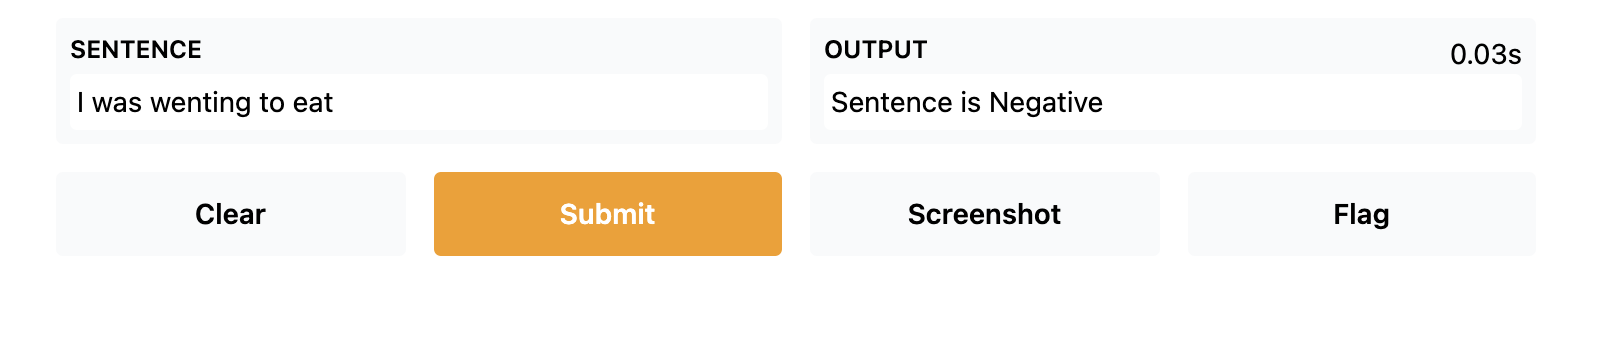

# Wandb Eval
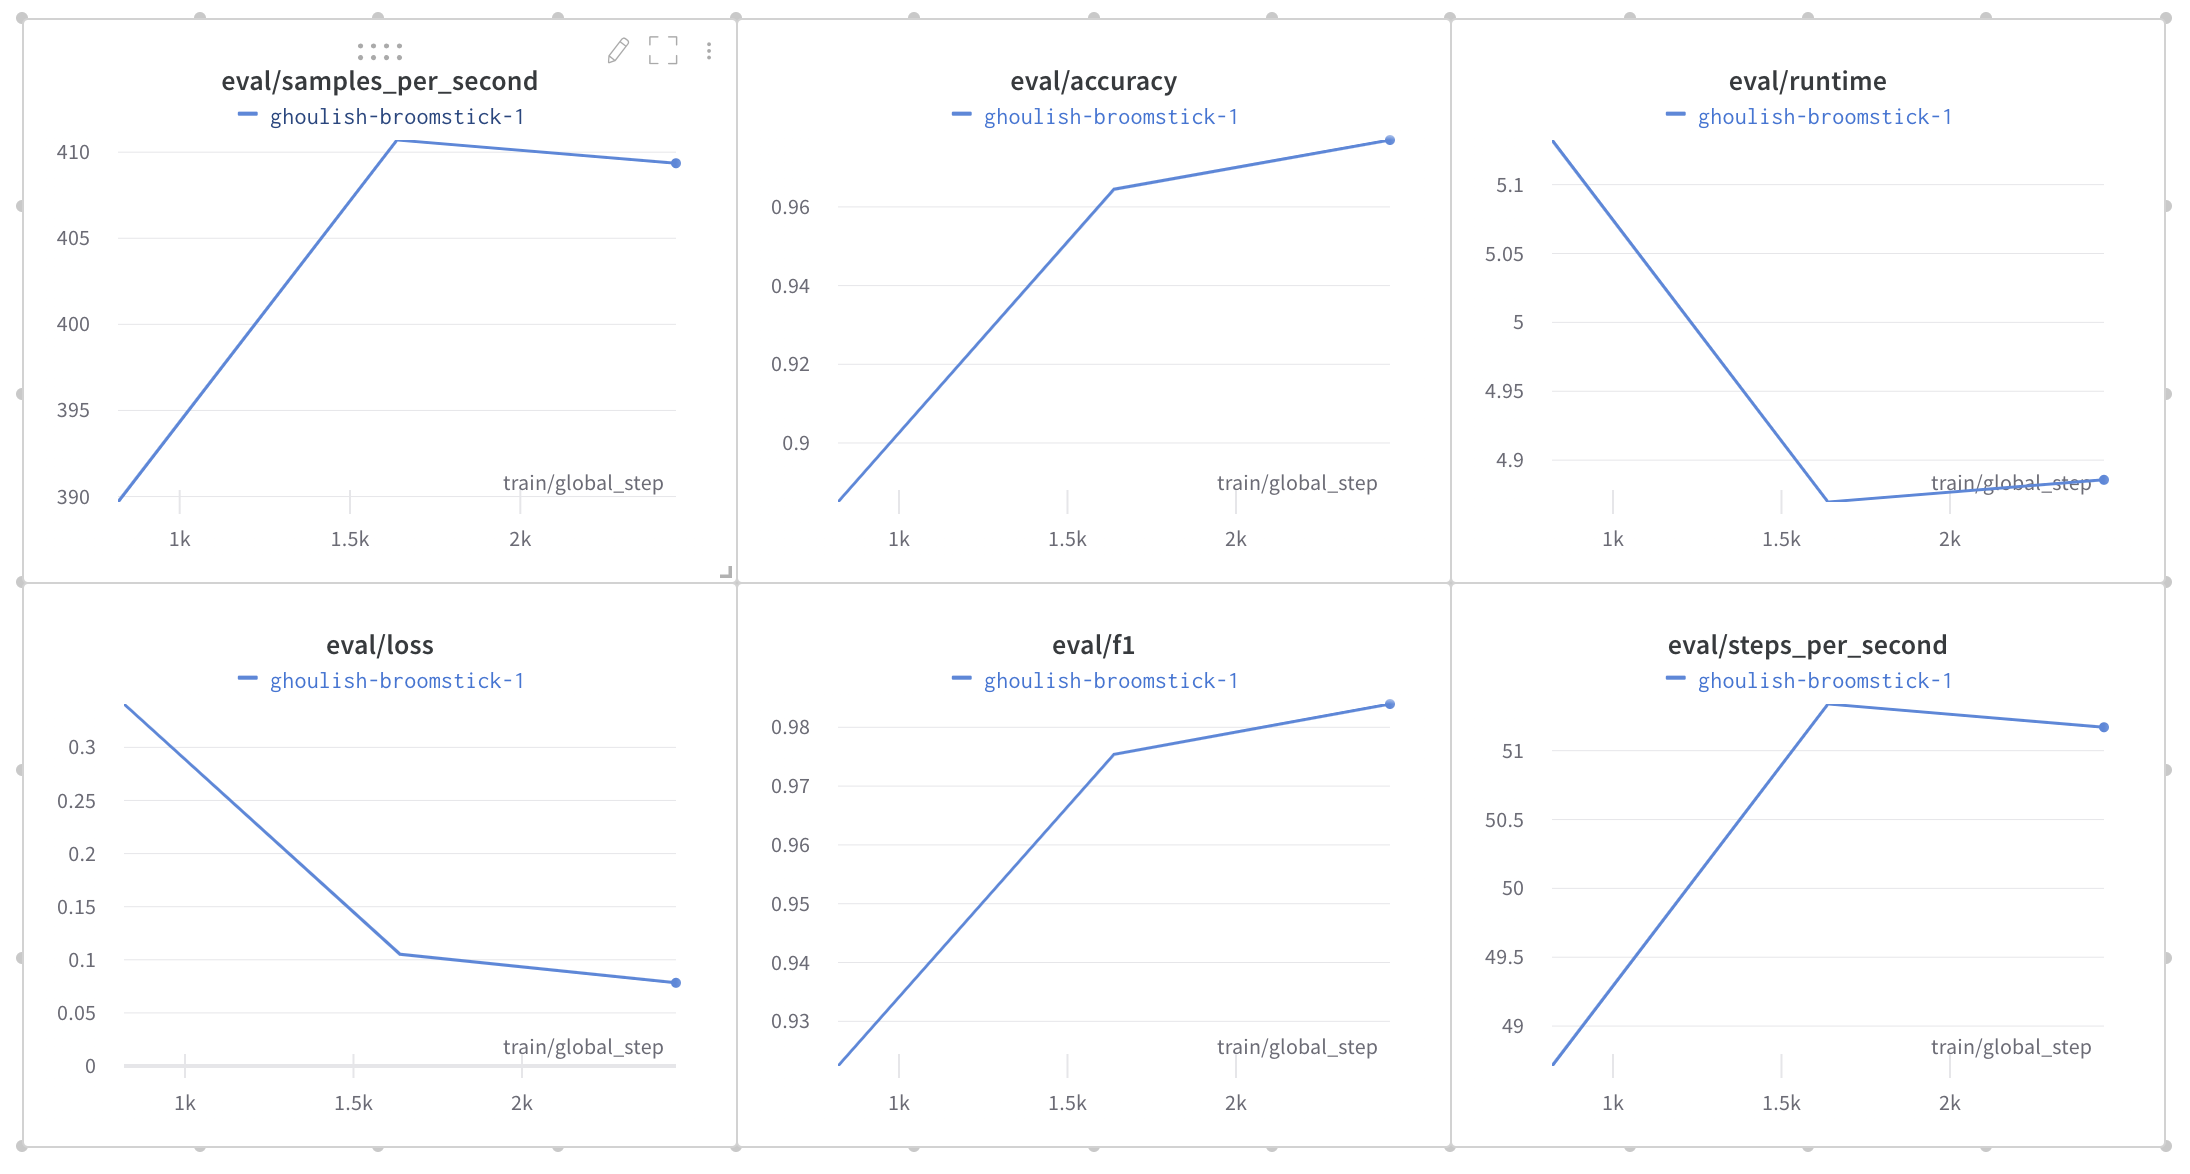

# Wandb Train
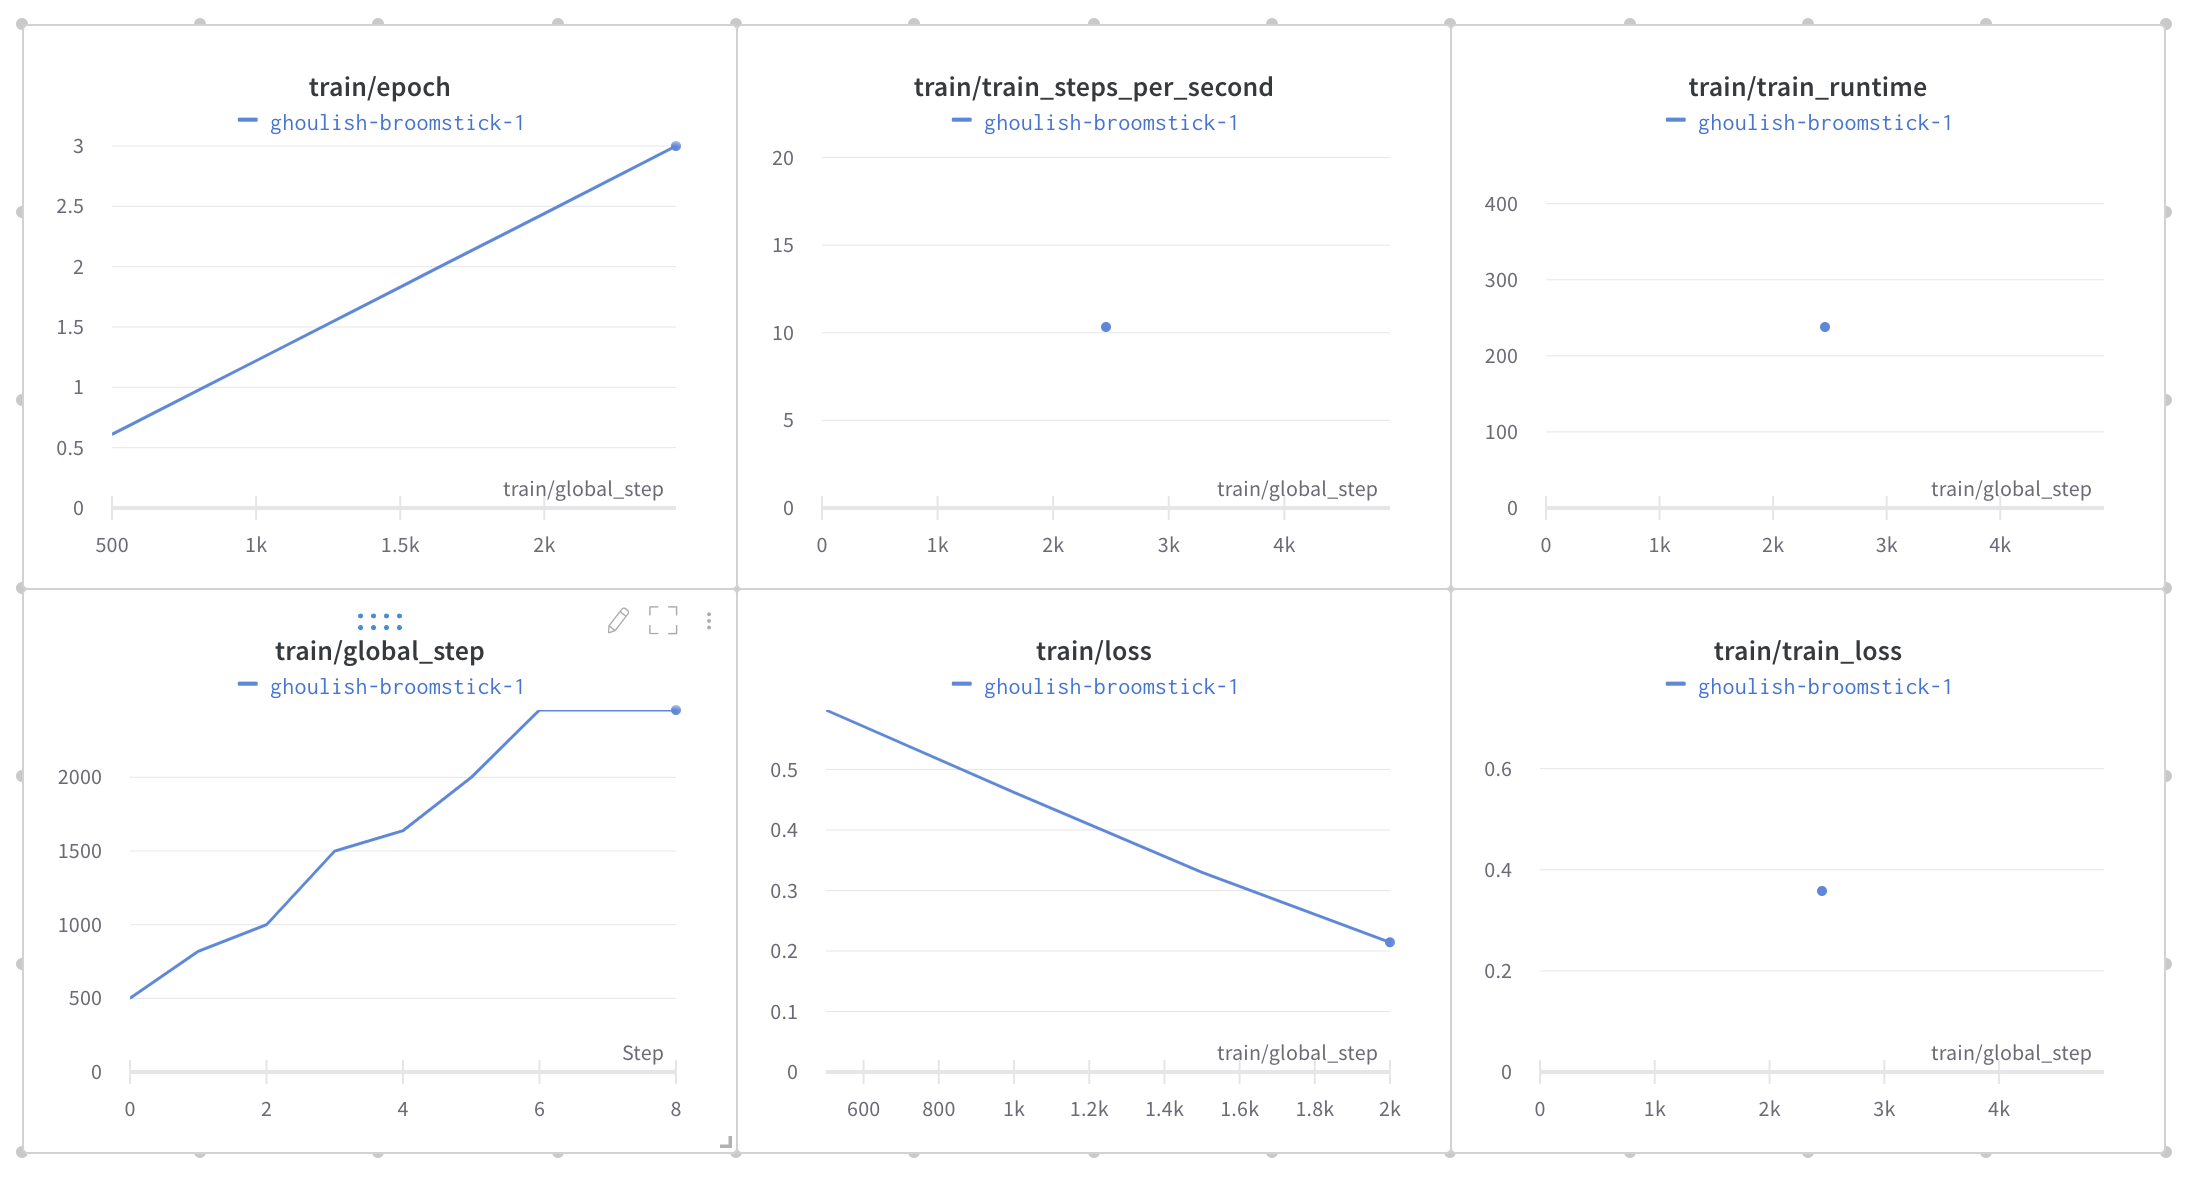